## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = './dataset/train'
valid_path = './dataset/test'


In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [5]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('./dataset/train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [16]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('./dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 411 images belonging to 4 classes.


In [18]:
test_set = test_datagen.flow_from_directory('./dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',shuffle=False)

Found 88 images belonging to 4 classes.


In [35]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
13/13 [==============================] - 73s 6s/step - loss: 3.3531 - accuracy: 0.3990 - val_loss: 2.3469 - val_accuracy: 0.5114
Epoch 2/50
13/13 [==============================] - 73s 6s/step - loss: 2.9876 - accuracy: 0.4574 - val_loss: 3.3124 - val_accuracy: 0.4773
Epoch 3/50
13/13 [==============================] - 73s 6s/step - loss: 2.6930 - accuracy: 0.4380 - val_loss: 2.0247 - val_accuracy: 0.5000
Epoch 4/50
13/13 [==============================] - 73s 6s/step - loss: 2.6417 - accuracy: 0.4866 - val_loss: 2.7831 - val_accuracy: 0.4545
Epoch 5/50
13/13 [==============================] - 72s 6s/step - loss: 2.6707 - accuracy: 0.4501 - val_loss: 2.5685 - val_accuracy: 0.5682
Epoch 6/50
13/13 [==============================] - 72s 6s/step - loss: 2.3501 - accuracy: 0.4672 - val_loss: 3.0392 - val_accuracy: 0.4773
Epoch 7/50
13/13 [==============================] - 73s 6s/step - loss: 2.8016 - accuracy: 0.4988 - val_loss: 2.9271 - val_accuracy: 0.5114
Epoch 8/50
13/13 [==

In [36]:
import matplotlib.pyplot as plt

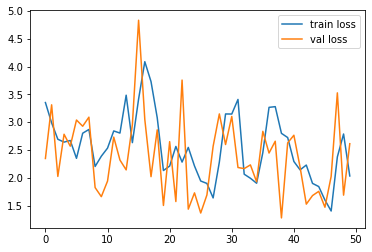

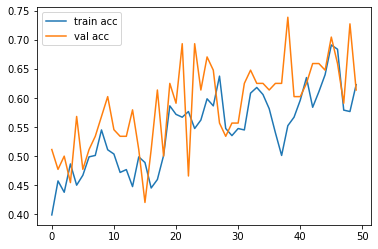

<Figure size 432x288 with 0 Axes>

In [37]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [38]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [39]:

y_pred = model.predict(test_set)


In [40]:
y_pred

array([[5.24470579e-07, 5.02404364e-05, 9.99949336e-01, 8.16782086e-10],
       [9.03236628e-01, 4.22914550e-02, 5.44718765e-02, 1.83540454e-08],
       [9.63360723e-03, 9.89513874e-01, 8.52469762e-04, 8.59843752e-09],
       [9.40452218e-01, 5.02599124e-03, 5.45215942e-02, 1.70242146e-07],
       [8.93570662e-01, 1.06376313e-01, 5.30922152e-05, 1.19850935e-10],
       [1.47450750e-03, 8.90330553e-01, 1.02965787e-01, 5.22915367e-03],
       [3.29902738e-01, 6.70095265e-01, 2.02460296e-06, 2.10298214e-08],
       [3.97312921e-03, 9.77005363e-01, 1.90215241e-02, 3.06976133e-08],
       [7.49996722e-01, 4.73016262e-04, 2.49530271e-01, 6.23161809e-12],
       [9.99287784e-01, 2.71708908e-04, 4.08705353e-04, 3.17897939e-05],
       [9.94054019e-01, 4.03457228e-03, 1.90984528e-03, 1.60870877e-06],
       [2.22306177e-01, 6.66088672e-05, 7.77627170e-01, 3.41667103e-08],
       [6.33605849e-03, 5.78275740e-01, 4.15388197e-01, 5.25719157e-09],
       [9.98273253e-01, 1.72583631e-03, 6.14740214e

In [41]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [42]:
y_pred

array([2, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 3, 2, 3, 2, 2, 3, 3, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2],
      dtype=int64)

In [43]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [44]:
img_data

NameError: name 'img_data' is not defined

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
import numpy as np

y_pred = model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)

y_true=test_set.classes

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)
cm

array([[15,  3,  1,  3],
       [ 3, 11,  6,  2],
       [ 0,  8, 12,  2],
       [ 0,  7,  9,  6]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_true,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.68      0.75        22
           1       0.38      0.50      0.43        22
           2       0.43      0.55      0.48        22
           3       0.46      0.27      0.34        22

    accuracy                           0.50        88
   macro avg       0.53      0.50      0.50        88
weighted avg       0.53      0.50      0.50        88



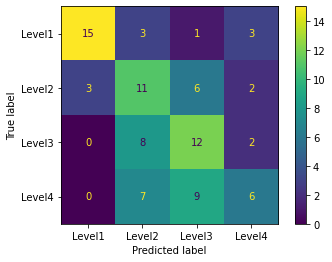

In [ ]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Level1','Level2','Level3','Level4'])

import matplotlib.pyplot as plt
cm_display.plot()
plt.show()